# 青春18切符ポスター風画像を作る('24.06.01)

## 1990年から4半世紀分の25年にわたる「青春18切符のポスター」

1990年から4半世紀分、2015年までの25年にわたる[「青春18切符のポスター」に関する書籍](青春18切符ポスター風画像を作る('24.06.01)
)を読んだ。
何だか懐かしくて、そして新しいポスターを眺めたくて、まずはChatGPTにコピー文を生成させてみた。

荒木経惟が撮影してた時代を踏まえてChatGPTが生成したコピー文は、たとえば、

- 時を越えて、線路は続く。
- 未来は、次の駅に待っている。

という具合で、なかなか良い感じだ。

次に、数式を踏まえたコピー文も生成させてみると、

- 冒険＝（新しい場所＋出会い）^勇気
- 青春＝(笑顔＋涙) ÷ 経験

といった、これまた良いフレーズを作成してくれる。前者の式なら「勇気が多ければ、指数的に冒険の度合いは大きくなる」し、後者の式なら「経験が少ない方が、青春度合いは無限に大きくなる」とか最高だ。
後者の式は

そして試しに「ライターが数学者なら？」と訊ねてみると、「発見の喜び = lim_{x→∞} (駅 + 景色)」というコピーを生成する。あるいは「物理学者なら？」と聞くと、「旅の確率波 = ψ(未知 + 出会い)^2」と返す。「吉本芸人だったら？」と言ってみると「青春のオチ = (珍道中 + ハプニング) ÷ 笑い」と答える。……なかなか良い感じだ。

## 青春18切符ポスター風画像を作る

ChatGPTが生成した「コピー文」を踏まえて、青春18切符ポスター風画像を作るスクリプトを書いてみた。
以下のPythonコードを実行すると、入力画像にコピー文を重ねて、青春18切符ポスター風画像が生成される。


In [1]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt

def put_text(img, text, anchor, direction,anc_pos, size, color):
    font = ImageFont.truetype(
        "data/day_240601_ipamp.ttf", size)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.text(anchor,
              text,
              fill=color,
              font=font,
              direction=direction,
              anchor=anc_pos
             )
    return np.array(img)

def put_multilinetext(img, text, anchor, direction, size, color):
    font = ImageFont.truetype(
        "data/day_240601_ipamp.ttf", size)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.multiline_text(anchor, text,
            fill=color,
            font=font,
            direction=direction)
    return np.array(img)

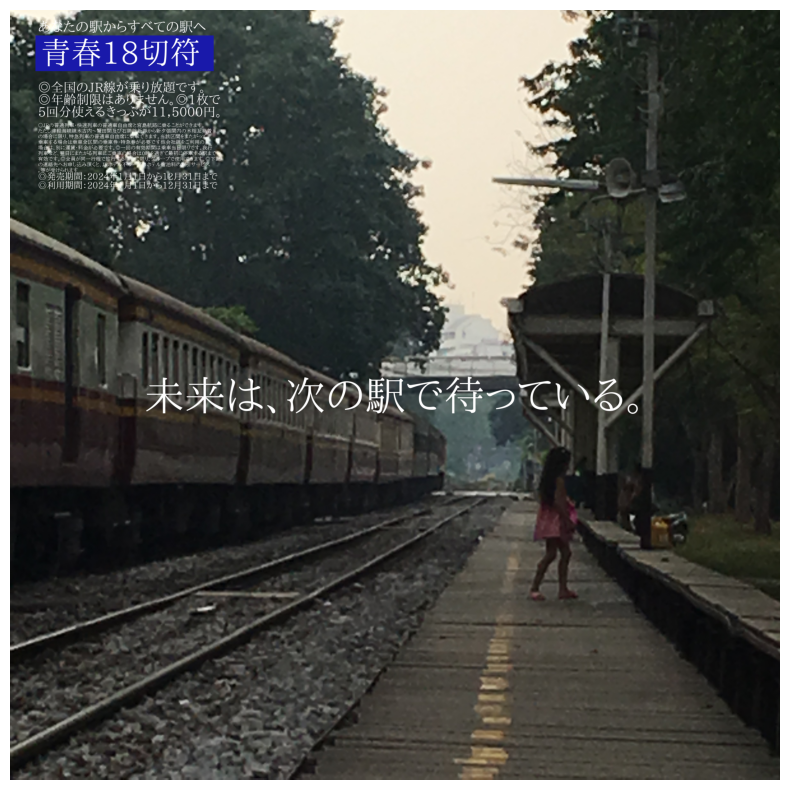

In [2]:
hon_mesage='。未来は、次の駅で待っている'

# 画像を読み込む
img= cv2.cvtColor(cv2.imread("data/day_240601_IMG_2259.JPG")
                  ,cv2.COLOR_BGR2RGB)
# 青枠内の文字を描く
img[100:240,100:800,0]=25
img[100:240,100:800,1]=25
img[100:240,100:800,2]=170
img = put_text(img, '青春18切符', 
    (120, 110),  'rtl','lt',
    120,       # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色

# 青枠上の文字
mesage='あなたの駅からすべての駅へ'
img = put_text(img, mesage, 
    (110, 40), 'rtl','lt', # 'rtl' 'mm' lt'
    55,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   

# 青枠下の文字
mesage='''
。全国のJR線が乗り放題です◎
年齢制限はありません。◎1枚で◎
。5回分使えるきっぷが11，5000円
'''
img = put_multilinetext(img, mesage, 
    (110, 110+120), 'rtl', # 'rtl' 'mm' lt'
    50,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    

mesage='''
。JRの普通列車・快速列車の普通車自由席と宮島航路に乗ることができます○
ただし津軽海峡線木古内〜蟹田間及び石勝線新得から新夕張間内の木相互発着
の場合に限り、特急列車の普通車自由席に乗車できます。当該区間をまたがって
乗車する場合は乗車全区間の乗車券・特急券が必要です他会社線をご利用の
場合は、別に運賃・料金が必要です。◎一回の有効期間は乗車当日限りです。夜行
列車など、翌日にまたがる列車にご乗車の場合は0時を過ぎて最初に停車する駅まで
有効です。◎全員が同一行程で旅行する場合に限り、グループで使用できます。◎下記
の連絡先へお申し込み頂くと、JRホテル不ループのホテル宿泊料の割引サービス
等が受けられます。
'''
img = put_multilinetext(img, mesage, 
    (110, 110+130+60+60+60), 'rtl', # 'rtl' 'mm' lt'
    20,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    
mesage='''
発売期間：2024年1月1日から12月31日まで◎
利用期間：2024年1月1日から12月31日まで◎
'''
img = put_multilinetext(img, mesage, 
    (110, 110+130+60+60+60+180), 'rtl', # 'rtl' 'mm' lt'
    35,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    

# コピー文を描画
img = put_text(img, hon_mesage, 
    (img.shape[1]/2, img.shape[0]/2), 'rtl','mm', # 'rtl' 'mm' lt'
    160,       # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    

fig=plt.figure(figsize=[10,10])
plt.imshow(img)
plt.axis('off')
plt.show()

## 駆け抜ける鴨川、刻まれる一瞬の物語。

今日は、京都鴨川の三条大橋下から出町柳へと、鴨川の中を走り抜く「鴨川レース」が開催されるらしい。
そこで、鴨川レースを眺めに三条大橋に行ったら、もうとっくに終わっていた。

鴨川レースを見ることはできなかったけれど、ChatGPTに鴨川レースの「青春18切符ポスター風コピー文」を生成させてみる。
すると、「駆け抜ける鴨川、刻まれる一瞬の物語。」というフレーズをChatGPTは生成した。
そこで、鴨川を撮影した写真にそんなコピー文も重ねてみる。

それにしても、鴨川の中を上流に向かって走る人たちを、眺めてみたかった……。

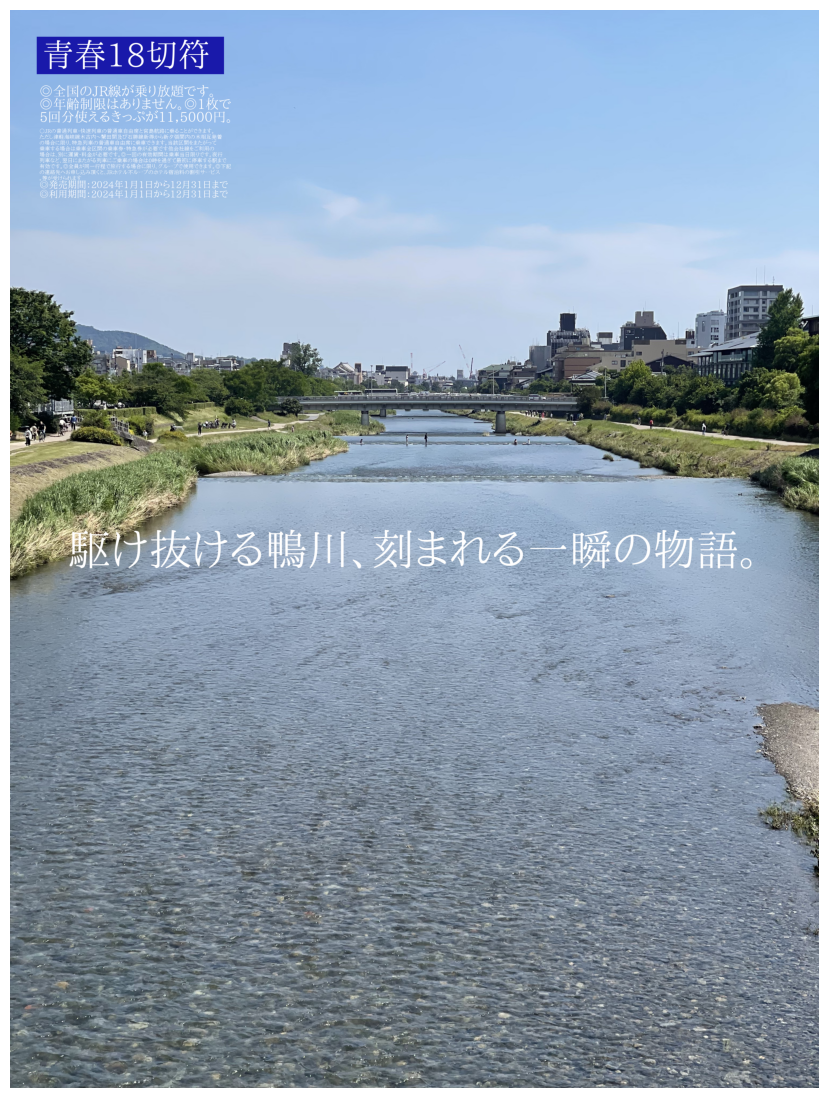

In [3]:
hon_mesage='。駆け抜ける鴨川、刻まれる一瞬の物語'

# 画像を読み込む
img= cv2.cvtColor(cv2.imread("data/day_240601_IMG_4014.jpg")
                  ,cv2.COLOR_BGR2RGB)
# 青枠内の文字を描く
img[100:240,100:800,0]=25
img[100:240,100:800,1]=25
img[100:240,100:800,2]=170
img = put_text(img, '青春18切符', 
    (120, 110),  'rtl','lt',
    120,       # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色
# 青枠下の文字
mesage='''
。全国のJR線が乗り放題です◎
年齢制限はありません。◎1枚で◎
。5回分使えるきっぷが11，5000円
'''
img = put_multilinetext(img, mesage, 
    (110, 110+120), 'rtl', # 'rtl' 'mm' lt'
    50,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    

mesage='''
。JRの普通列車・快速列車の普通車自由席と宮島航路に乗ることができます○
ただし津軽海峡線木古内〜蟹田間及び石勝線新得から新夕張間内の木相互発着
の場合に限り、特急列車の普通車自由席に乗車できます。当該区間をまたがって
乗車する場合は乗車全区間の乗車券・特急券が必要です他会社線をご利用の
場合は、別に運賃・料金が必要です。◎一回の有効期間は乗車当日限りです。夜行
列車など、翌日にまたがる列車にご乗車の場合は0時を過ぎて最初に停車する駅まで
有効です。◎全員が同一行程で旅行する場合に限り、グループで使用できます。◎下記
の連絡先へお申し込み頂くと、JRホテル不ループのホテル宿泊料の割引サービス
等が受けられます。
'''
img = put_multilinetext(img, mesage, 
    (110, 110+130+60+60+60), 'rtl', # 'rtl' 'mm' lt'
    20,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    
mesage='''
発売期間：2024年1月1日から12月31日まで◎
利用期間：2024年1月1日から12月31日まで◎
'''
img = put_multilinetext(img, mesage, 
    (110, 110+130+60+60+60+180), 'rtl', # 'rtl' 'mm' lt'
    35,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   

# コピー文
img = put_text(img, hon_mesage, 
    (img.shape[1]/2, img.shape[0]/2), 'rtl','mm', # 'rtl' 'mm' lt'
    160,       # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    

fig=plt.figure(figsize=[14,14])
plt.imshow(img)
plt.axis('off')
plt.show()